In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


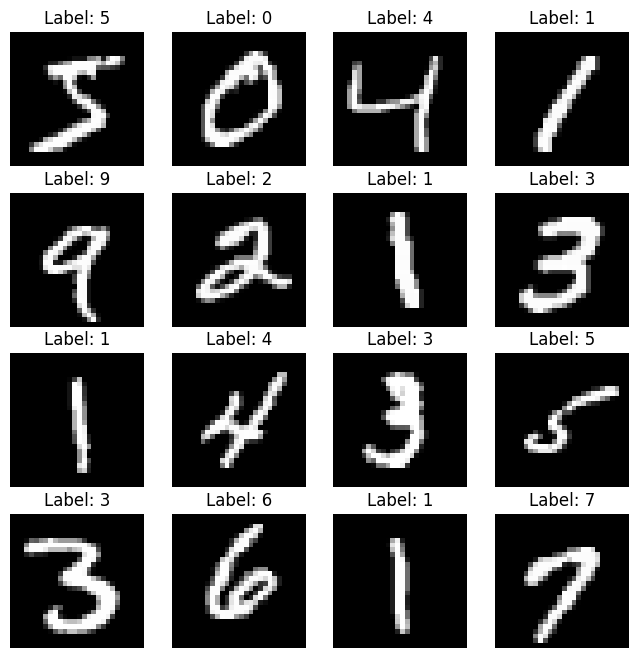

In [6]:
plt.figure(figsize=(8,8))
for i in range(16):   
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [7]:
print("Pixel value range:", x_train.min(), "to", x_train.max())

Pixel value range: 0 to 255


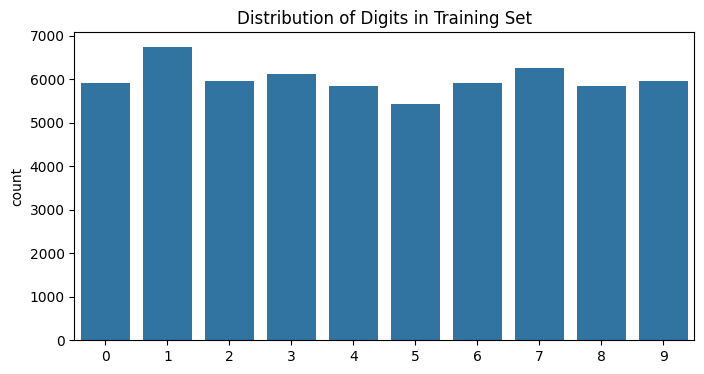

In [8]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.show()

### Preprocessing

1) Normalize the Pixel values from 0 to 1
2) Reshape images for CNN
3) OneHot Encoding for Labels
4) Data Augmentation to improve Accuracy

### Normalize images

In [9]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("Pixel value range:", x_train.min(), "to", x_train.max())
print("Pixel value range:", x_test.min(), "to", x_test.max())

Pixel value range: 0.0 to 1.0
Pixel value range: 0.0 to 1.0


### Reshape the Images

In [10]:
print(f"shape of x train {x_train.shape}")
print(f"shape of x test {x_test.shape}")

shape of x train (60000, 28, 28)
shape of x test (10000, 28, 28)


In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(f"shape of x train {x_train.shape}")
print(f"shape of x test {x_test.shape}")

shape of x train (60000, 28, 28, 1)
shape of x test (10000, 28, 28, 1)


### Applying OneHot Encoding to labels

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

### Data Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.GlobalMaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")

])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_3          │ (None, 64)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,426 (111.04 KB)

 Trainable params: 28,426 (111.04 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(
    datagen.flow(x_train,y_train, batch_size=32),
    validation_data = (x_test,y_test),
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8198 - loss: 0.5618 - val_accuracy: 0.9573 - val_loss: 0.1354
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9378 - loss: 0.2008 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9538 - loss: 0.1519 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9607 - loss: 0.1283 - val_accuracy: 0.9754 - val_loss: 0.0807
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9637 - loss: 0.1168 - val_accuracy: 0.9813 - val_loss: 0.0626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9672 - loss: 0.1072 - val_accuracy: 0.9815 - val_loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9684 - loss: 0.1020 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9702 

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9817 - loss: 0.0593
Test Accuracy: 0.9817000031471252


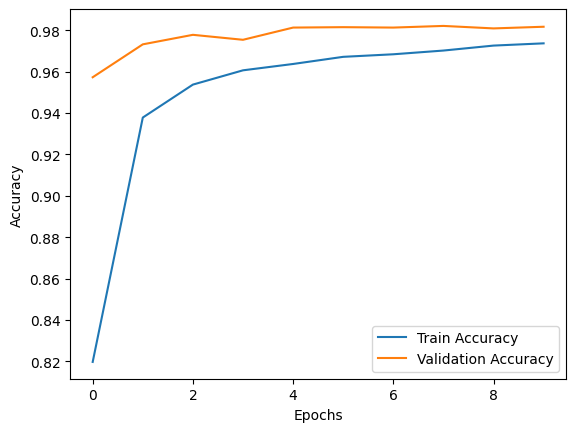

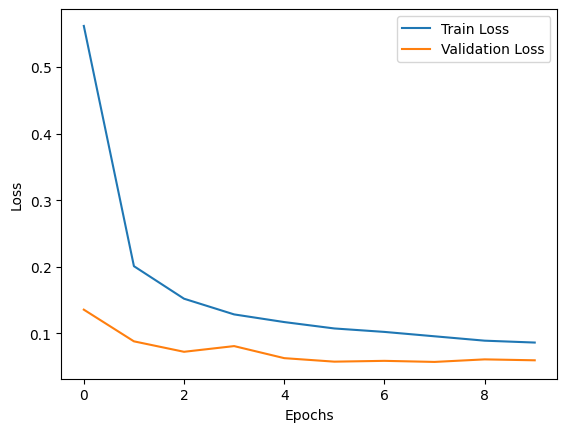

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
import numpy as np

predictions = model.predict(x_test[:5])
print("Predicted labels:", np.argmax(predictions, axis=1))
print("True labels:     ", np.argmax(y_test[:5], axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted labels: [7 2 1 0 4]
True labels:      [7 2 1 0 4]
